# Modulo 3. Prueba técnica

In [139]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Primera Fase

In [140]:
# Funcion Abrir ficheros

def open_file(ruta):
    csv_apertura= pd.read_csv(ruta, index_col=0)
    csv_apertura.reset_index(inplace = True)
    display(csv_apertura.sample(5))
    return csv_apertura


In [141]:
# Funcion Exploración datos

def data_exploring(csv):
    forma = csv.shape
    print(f"La forma es {forma}")
    print("_______________")
    columnas = csv.columns
    print(f"Las columnas son {columnas}")
    print("_______________")
    nulos = csv.isna().sum().reset_index()
    print(f"Los nulos son:")
    display(nulos)
    print("_______________")
    duplicados = csv.duplicated().sum()
    print(f"Hay {duplicados} duplicados")
    print("_______________")
    tipo_dato = csv.dtypes.reset_index()
    print(f"Los datos son de tipo:")
    display(tipo_dato)
    


In [142]:
def convertir_minusculas(valor):
    
    if isinstance(valor, str):
        return valor.lower() 
    else:
        return valor

In [143]:
def con_reservas(df, column_name):
    return df.drop(df[df[column_name] == 0].index, inplace=True)

- Exploración fichero flight_activity

In [144]:
flight_activity = open_file("Files/Customer_Flight_Activity.csv")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
183754,883376,2017,11,0,0,0,0,0.0,0,0
15236,910645,2017,1,0,0,0,0,0.0,0,0
355996,158314,2018,10,0,0,0,0,0.0,0,0
119381,158113,2017,8,10,0,10,4160,416.0,0,0
94630,638506,2017,6,13,0,13,1378,137.0,0,0


In [145]:
data_exploring(flight_activity)

La forma es (405624, 10)
_______________
Las columnas son Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,Loyalty Number,0
1,Year,0
2,Month,0
3,Flights Booked,0
4,Flights with Companions,0
5,Total Flights,0
6,Distance,0
7,Points Accumulated,0
8,Points Redeemed,0
9,Dollar Cost Points Redeemed,0


_______________
Hay 1864 duplicados
_______________
Los datos son de tipo:


,index,0
0,Loyalty Number,int64
1,Year,int64
2,Month,int64
3,Flights Booked,int64
4,Flights with Companions,int64
5,Total Flights,int64
6,Distance,int64
7,Points Accumulated,float64
8,Points Redeemed,int64
9,Dollar Cost Points Redeemed,int64


In [146]:
#Quitamos valores duplicados

flight_activity.drop_duplicates(inplace=True)


In [147]:
#Renombramos las columnas

fa_names = ["loyalty_number", "year", "month", "flights_booked", "flights_with_companions", "total_flights", "distance", "points_accumulated", "points_redeemed", "dollar_cost_points_redeemed"]

flight_activity.columns = fa_names
  

- Exploración fichero Customers_loyalty_History

In [148]:
loyalty_history= open_file("Files/Customer_Loyalty_History.csv")

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
3038,284362,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Doctor,124103.0,Single,Aurora,10056.51,Standard,2016,1,NaN,NaN
7390,553530,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Nova,6847.59,Standard,2016,1,NaN,NaN
2632,244652,Canada,British Columbia,Vancouver,V6E 3D9,Male,High School or Below,47238.0,Married,Aurora,8558.04,Standard,2014,9,NaN,NaN
12740,370990,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,87262.0,Married,Star,4349.31,Standard,2013,1,NaN,NaN
11449,532978,Canada,Ontario,Sudbury,M5V 1G5,Male,High School or Below,80604.0,Married,Star,2648.35,Standard,2014,10,NaN,NaN


In [149]:
data_exploring(loyalty_history)

La forma es (16737, 16)
_______________
Las columnas son Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,Loyalty Number,0
1,Country,0
2,Province,0
3,City,0
4,Postal Code,0
5,Gender,0
6,Education,0
7,Salary,4238
8,Marital Status,0
9,Loyalty Card,0


_______________
Hay 0 duplicados
_______________
Los datos son de tipo:


,index,0
0,Loyalty Number,int64
1,Country,object
2,Province,object
3,City,object
4,Postal Code,object
5,Gender,object
6,Education,object
7,Salary,float64
8,Marital Status,object
9,Loyalty Card,object


In [150]:
#Renombramos columnas

loyalty_history.columns = loyalty_history.columns.str.lower().str.replace(' ', '_')

loyalty_history.sample(1)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
5964,544837,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,90071.0,Divorced,Nova,4626.8,Standard,2017,5,NaN,NaN


In [151]:
#Cambiamos valores negativos de la columna salary

loyalty_history["salary"].sort_values(ascending=True)


7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
          ...   
16721        NaN
16727        NaN
16731        NaN
16732        NaN
16734        NaN
Name: salary, Length: 16737, dtype: float64

In [152]:
loyalty_history["salary"] = loyalty_history["salary"].abs() 

- Evaluación Nulos

        Columna Salary

In [153]:
#Evaluación de nulos

sal_null = np.round((loyalty_history["salary"].isnull().sum() / loyalty_history.shape[0]) * 100)

print(f'el valor de los nulos en la columna salary representa un {sal_null}% de los datos')

print("......................................................................................")

null_education = loyalty_history.groupby('education')['salary'].apply(lambda x: x.isnull().sum())

print(null_education.reset_index())

print("......................................................................................")

salary_education = np.round(loyalty_history.groupby('education')['salary'].mean(),2)

print(salary_education.reset_index())

print("......................................................................................")

customer_education = loyalty_history['education'].value_counts()

print(customer_education.reset_index())



el valor de los nulos en la columna salary representa un 25.0% de los datos
......................................................................................
              education  salary
0              Bachelor       0
1               College    4238
2                Doctor       0
3  High School or Below       0
4                Master       0
......................................................................................
              education     salary
0              Bachelor   72577.25
1               College        NaN
2                Doctor  178608.90
3  High School or Below   61199.16
4                Master  103757.85
......................................................................................
                  index  education
0              Bachelor      10475
1               College       4238
2  High School or Below        782
3                Doctor        734
4                Master        508


El nivel educativo collage no tiene información en la columna salario por tanto, analizamos más en profundidad que ocurre en las demás columnas

In [154]:
lh_collage = loyalty_history.loc[loyalty_history["education"]=="College",:]

lh_collage

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN


En función de la evaluación, como el resto de columnas sí contienen datos, vamos a reemplazar los nulos por cero. De esta forma, podremos analizar el resto de información para el nivel educativo college, excepto para la variable salary

        Columna cancellation_year	

In [155]:
cany_null = np.round((loyalty_history["cancellation_year"].isnull().sum() / loyalty_history.shape[0]) * 100)

print(f'el valor de los nulos en la columna cancellation_year representa un {cany_null}% de los datos')

el valor de los nulos en la columna cancellation_year representa un 88.0% de los datos


        Columna cancellation_month

In [156]:
canm_null = np.round((loyalty_history["cancellation_month"].isnull().sum() / loyalty_history.shape[0]) * 100)

print(f'el valor de los nulos en la columna cancellation_month representa un {canm_null}% de los datos')

el valor de los nulos en la columna cancellation_month representa un 88.0% de los datos


Para estas dos columnas, el número de nulos es muy elevado, representa el 88% de la muestra por tanto, no incluimos estas dos columnas en nuestro análisis.

- Analizamos información de las columnas categóricas

In [157]:
country = loyalty_history["country"].unique()
print(f"el país origen de nuestros clientes es: {country}")
print("----------------------------------------")
Province = loyalty_history["province"].unique()
print(f"las provincias de {country} son: {Province}")
print("----------------------------------------")
Gender = loyalty_history["gender"].unique()
print(f'el género de los clientes en el DF es: {Gender}')
print("----------------------------------------")
education= loyalty_history["education"].unique()
print(f'El nivel educativo de los clientes se distribuye en: {education}')
print("----------------------------------------")
tipo_suscrip = loyalty_history["enrollment_type"].unique()
print(f"el tipo de suscripción de los clientes es: {tipo_suscrip}")
print("----------------------------------------")
tipo_tarj = loyalty_history["loyalty_card"].unique()
print(f"el tipo de tarjeta de los clientes es: {tipo_tarj}")
print("----------------------------------------")

el país origen de nuestros clientes es: ['Canada']
----------------------------------------
las provincias de ['Canada'] son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
----------------------------------------
el género de los clientes en el DF es: ['Female' 'Male']
----------------------------------------
El nivel educativo de los clientes se distribuye en: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
----------------------------------------
el tipo de suscripción de los clientes es: ['Standard' '2018 Promotion']
----------------------------------------
el tipo de tarjeta de los clientes es: ['Star' 'Aurora' 'Nova']
----------------------------------------


In [158]:
#Convertir a minúsculas todas las columnas categóricas

cat_cols = loyalty_history.select_dtypes(include=['object']).columns.tolist()

for columna in cat_cols:
    loyalty_history[columna] = loyalty_history[columna].apply(convertir_minusculas)

In [159]:
#Unimos ambos ficheros

flt_info = flight_activity.merge(loyalty_history, on="loyalty_number")


In [160]:
#Exploramos datos del merge
data_exploring(flt_info)

La forma es (403760, 25)
_______________
Las columnas son Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,loyalty_number,0
1,year,0
2,month,0
3,flights_booked,0
4,flights_with_companions,0
5,total_flights,0
6,distance,0
7,points_accumulated,0
8,points_redeemed,0
9,dollar_cost_points_redeemed,0


_______________
Hay 0 duplicados
_______________
Los datos son de tipo:


,index,0
0,loyalty_number,int64
1,year,int64
2,month,int64
3,flights_booked,int64
4,flights_with_companions,int64
5,total_flights,int64
6,distance,int64
7,points_accumulated,float64
8,points_redeemed,int64
9,dollar_cost_points_redeemed,int64


In [161]:
flt_info.sort_values(by="salary",ascending=True)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
110162,366599,2017,10,8,0,8,1096,109.0,0,0,canada,ontario,toronto,m1r 4k3,female,bachelor,9081.0,married,star,6915.73,2018 promotion,2018,4,NaN,NaN
110175,366599,2018,11,3,0,3,1488,148.0,0,0,canada,ontario,toronto,m1r 4k3,female,bachelor,9081.0,married,star,6915.73,2018 promotion,2018,4,NaN,NaN
110174,366599,2018,10,4,1,5,910,91.0,0,0,canada,ontario,toronto,m1r 4k3,female,bachelor,9081.0,married,star,6915.73,2018 promotion,2018,4,NaN,NaN
110173,366599,2018,9,5,5,10,3810,381.0,0,0,canada,ontario,toronto,m1r 4k3,female,bachelor,9081.0,married,star,6915.73,2018 promotion,2018,4,NaN,NaN
110172,366599,2018,8,0,0,0,0,0.0,0,0,canada,ontario,toronto,m1r 4k3,female,bachelor,9081.0,married,star,6915.73,2018 promotion,2018,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403683,999304,2018,8,0,0,0,0,0.0,0,0,canada,ontario,toronto,p5s 6r4,male,college,NaN,single,nova,9778.98,standard,2015,1,2017.0,6.0
403684,999304,2018,9,0,0,0,0,0.0,0,0,canada,ontario,toronto,p5s 6r4,male,college,NaN,single,nova,9778.98,standard,2015,1,2017.0,6.0
403685,999304,2018,10,0,0,0,0,0.0,0,0,canada,ontario,toronto,p5s 6r4,male,college,NaN,single,nova,9778.98,standard,2015,1,2017.0,6.0
403686,999304,2018,11,0,0,0,0,0.0,0,0,canada,ontario,toronto,p5s 6r4,male,college,NaN,single,nova,9778.98,standard,2015,1,2017.0,6.0


- Gesión de nulos

In [162]:
# Cambiamos los nulos en la columna salary por 0

flt_info['salary'].fillna(0,inplace=True)

In [163]:
#Eliminamos las columnas cancellation_month y cancellation_year

col = ["cancellation_month", "cancellation_year"]

flt_info.drop(columns=col, inplace=True)

In [164]:
data_exploring(flt_info)

La forma es (403760, 23)
_______________
Las columnas son Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,loyalty_number,0
1,year,0
2,month,0
3,flights_booked,0
4,flights_with_companions,0
5,total_flights,0
6,distance,0
7,points_accumulated,0
8,points_redeemed,0
9,dollar_cost_points_redeemed,0


_______________
Hay 0 duplicados
_______________
Los datos son de tipo:


,index,0
0,loyalty_number,int64
1,year,int64
2,month,int64
3,flights_booked,int64
4,flights_with_companions,int64
5,total_flights,int64
6,distance,int64
7,points_accumulated,float64
8,points_redeemed,int64
9,dollar_cost_points_redeemed,int64


- Analizamos la coherencia de los datos

In [165]:
flt_book = flt_info.loc[flt_info["flights_booked"]==0,:]

flt_book

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
4,100018,2017,5,0,0,0,0,0.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
17,100018,2018,5,0,0,0,0,0.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
18,100018,2018,6,0,0,0,0,0.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
20,100018,2018,8,0,0,0,0,0.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
25,100102,2017,2,0,0,0,0,0.0,0,0,canada,ontario,toronto,m1r 4k3,male,college,0.0,single,nova,2887.74,standard,2013,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999891,2018,8,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3j 9s2,female,bachelor,75616.0,married,nova,3745.37,standard,2016,5
403756,999891,2018,9,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3j 9s2,female,bachelor,75616.0,married,nova,3745.37,standard,2016,5
403757,999891,2018,10,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3j 9s2,female,bachelor,75616.0,married,nova,3745.37,standard,2016,5
403758,999891,2018,11,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3j 9s2,female,bachelor,75616.0,married,nova,3745.37,standard,2016,5


Filtramos todas aquellas reservas que son igual a 0 porque no nos aportan información, en estos casos, el número de vuelos fue 0

In [166]:
flt_info.drop(flt_info[flt_info["flights_booked"]==0].index, inplace=True)

In [167]:
flt_info

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
1,100018,2017,2,2,2,4,1320,132.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
2,100018,2018,10,6,4,10,3110,311.0,385,31,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
3,100018,2017,4,4,0,4,924,92.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
5,100018,2017,6,4,1,5,4330,433.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403717,999788,2017,6,5,3,8,4720,472.0,0,0,canada,ontario,london,m5b 3e4,male,bachelor,56345.0,married,nova,8409.07,standard,2017,2
403718,999788,2017,7,7,0,7,3346,334.0,0,0,canada,ontario,london,m5b 3e4,male,bachelor,56345.0,married,nova,8409.07,standard,2017,2
403719,999788,2017,8,11,0,11,3575,357.0,0,0,canada,ontario,london,m5b 3e4,male,bachelor,56345.0,married,nova,8409.07,standard,2017,2
403730,999788,2017,10,4,3,7,868,86.0,361,29,canada,ontario,london,m5b 3e4,male,bachelor,56345.0,married,nova,8409.07,standard,2017,2


- Adecuamos el formato de las columnas

In [168]:
flt_info['year'] = pd.to_datetime(flt_info['year'], format='%Y')
flt_info['month'] = pd.to_datetime(flt_info['month'], format='%m')
flt_info['loyalty_number'] = flt_info['loyalty_number'].astype(str)
flt_info['points_accumulated'] = flt_info['points_accumulated'].astype(int)
flt_info['dollar_cost_points_redeemed'] = flt_info['dollar_cost_points_redeemed'].astype(float)

In [169]:
flt_info.dtypes

loyalty_number                         object
year                           datetime64[ns]
month                          datetime64[ns]
flights_booked                          int64
flights_with_companions                 int64
total_flights                           int64
distance                                int64
points_accumulated                      int64
points_redeemed                         int64
dollar_cost_points_redeemed           float64
country                                object
province                               object
city                                   object
postal_code                            object
gender                                 object
education                              object
salary                                float64
marital_status                         object
loyalty_card                           object
clv                                   float64
enrollment_type                        object
enrollment_year                   

- Datos estadísticos de variables numéricas

In [170]:
np.round(flt_info.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
flights_booked,207632.0,8.04,4.67,1.00,4.00,8.00,11.00,21.00
flights_with_companions,207632.0,2.02,2.54,0.00,0.00,1.00,4.00,11.00
total_flights,207632.0,10.05,5.81,1.00,6.00,10.00,14.00,32.00
distance,207632.0,2361.63,1135.84,90.00,1458.00,2298.00,3150.00,6293.00
points_accumulated,207632.0,241.59,116.12,9.00,149.00,235.00,323.00,676.00
points_redeemed,207632.0,59.97,170.31,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,207632.0,4.85,13.78,0.00,0.00,0.00,0.00,71.00
salary,207632.0,59369.86,45766.39,0.00,0.00,63840.00,83224.00,407228.00
clv,207632.0,7956.92,6751.28,1898.01,3974.86,5768.83,8937.12,83325.38
enrollment_year,207632.0,2014.86,1.84,2012.00,2013.00,2015.00,2016.00,2018.00


- Datos estadísticos de variables categóricas

In [171]:
flt_info.describe(include = "object").T

,count,unique,top,freq
loyalty_number,207632,15236,965605,39
country,207632,1,canada,207632
province,207632,11,ontario,67035
city,207632,29,toronto,41958
postal_code,207632,55,v6e 3d9,11149
gender,207632,2,male,103903
education,207632,5,bachelor,129303
marital_status,207632,3,married,120890
loyalty_card,207632,3,star,94683
enrollment_type,207632,2,standard,198576


## Segunda fase

In [172]:
flt_info.sort_values(by=["year","month"],ascending=[True,True],inplace= True)

In [173]:
flt_info.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017-01-01,1900-01-01,3,0,3,1521,152,0,0.0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
24,100102,2017-01-01,1900-01-01,10,4,14,2030,203,0,0.0,canada,ontario,toronto,m1r 4k3,male,college,0.0,single,nova,2887.74,standard,2013,3
48,100140,2017-01-01,1900-01-01,6,0,6,1200,120,0,0.0,canada,british columbia,dawson creek,u5i 4f1,female,college,0.0,divorced,nova,2838.07,standard,2016,7
192,100428,2017-01-01,1900-01-01,6,0,6,606,60,0,0.0,canada,british columbia,vancouver,v6e 3d9,male,bachelor,63478.0,married,aurora,5845.43,standard,2012,8
240,100550,2017-01-01,1900-01-01,3,0,3,2037,203,0,0.0,canada,quebec,montreal,h2y 4r4,female,bachelor,54133.0,married,nova,7861.80,standard,2013,2


**Distibución de vuelos durante el año**

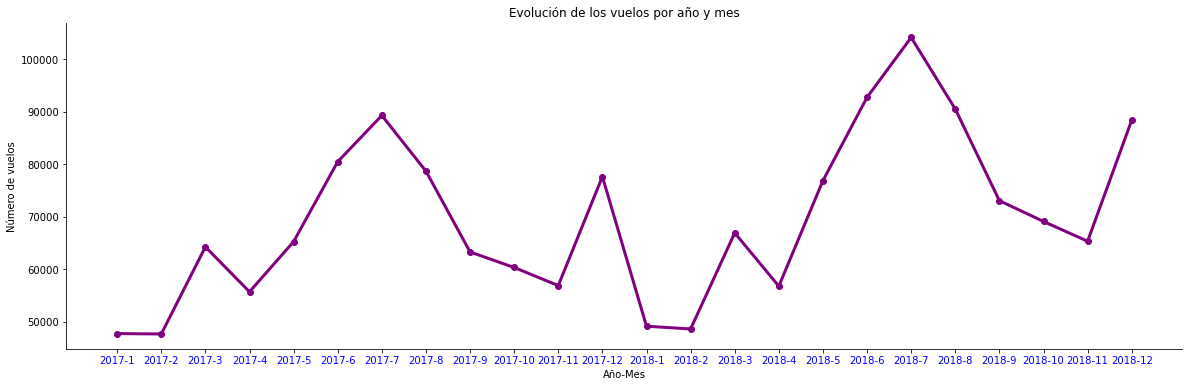

In [174]:
# Obtener los datos de vuelos
vuelos = flt_info.groupby([flt_info['year'].dt.year, flt_info['month'].dt.month])['flights_booked'].sum()

# Obtener todas las etiquetas de eje x
etiquetas_x = [f'{año}-{mes}' for año, mes in vuelos.index]

# Establecer las posiciones de los ticks del eje x
posiciones_x = list(range(len(etiquetas_x)))

plt.figure(figsize=(20, 6))
vuelos.plot(kind='line', marker='o', linestyle='-', color='purple', linewidth=3)

plt.title('Evolución de los vuelos por año y mes')
plt.xlabel('Año-Mes')
plt.ylabel('Número de vuelos')

# Establecer las etiquetas del eje x y sus posiciones
plt.xticks(posiciones_x, etiquetas_x, color="blue", fontsize=10)

# Quitar las líneas de los ejes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

En el gráfico vemos que la evolución de vuelos sigue un patrón estacional:

- Enero y febrero son los meses con menos vuelos
- Marzo es el primer pico del año
- En abril observamos una caída de reserva
- Entre mayo y lulio observamos una tendencia de crecimiento constante, llegando su pico en julio.
- A parti de agosto la tendencia es a la baja hasa los meses de noviembre y diciembre donde repunta.

**Relación entre la distancia y los puntos acumulados**

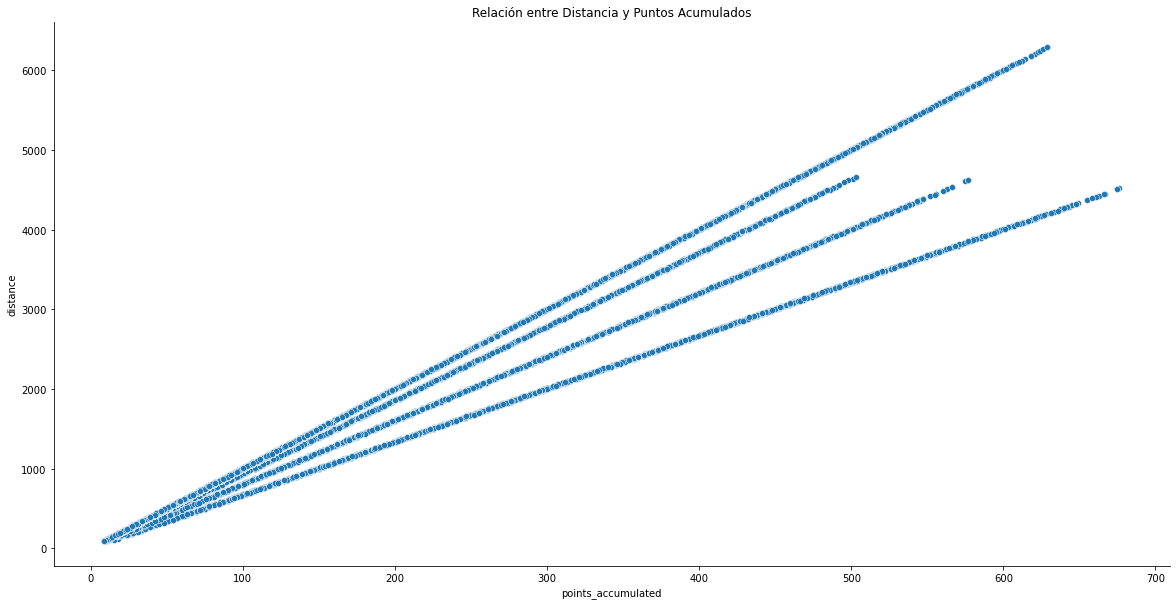

In [175]:
#Crear el gráfico de dispersión
plt.figure(figsize=(20, 10))
sns.scatterplot(x="points_accumulated", y="distance",data=flt_info)
#Añadir etiquetas y título
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.xlabel('points_accumulated')
plt.ylabel('distance')
# Quitar las líneas de los ejes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);




Como podemos ver, existe una relación lineal entre estas dos variables, a más distancia, más puntos acumulados.

**Distribución de los clientes por Provincia/Estado**

In [176]:
flt_info.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017-01-01,1900-01-01,3,0,3,1521,152,0,0.0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
24,100102,2017-01-01,1900-01-01,10,4,14,2030,203,0,0.0,canada,ontario,toronto,m1r 4k3,male,college,0.0,single,nova,2887.74,standard,2013,3
48,100140,2017-01-01,1900-01-01,6,0,6,1200,120,0,0.0,canada,british columbia,dawson creek,u5i 4f1,female,college,0.0,divorced,nova,2838.07,standard,2016,7
192,100428,2017-01-01,1900-01-01,6,0,6,606,60,0,0.0,canada,british columbia,vancouver,v6e 3d9,male,bachelor,63478.0,married,aurora,5845.43,standard,2012,8
240,100550,2017-01-01,1900-01-01,3,0,3,2037,203,0,0.0,canada,quebec,montreal,h2y 4r4,female,bachelor,54133.0,married,nova,7861.80,standard,2013,2


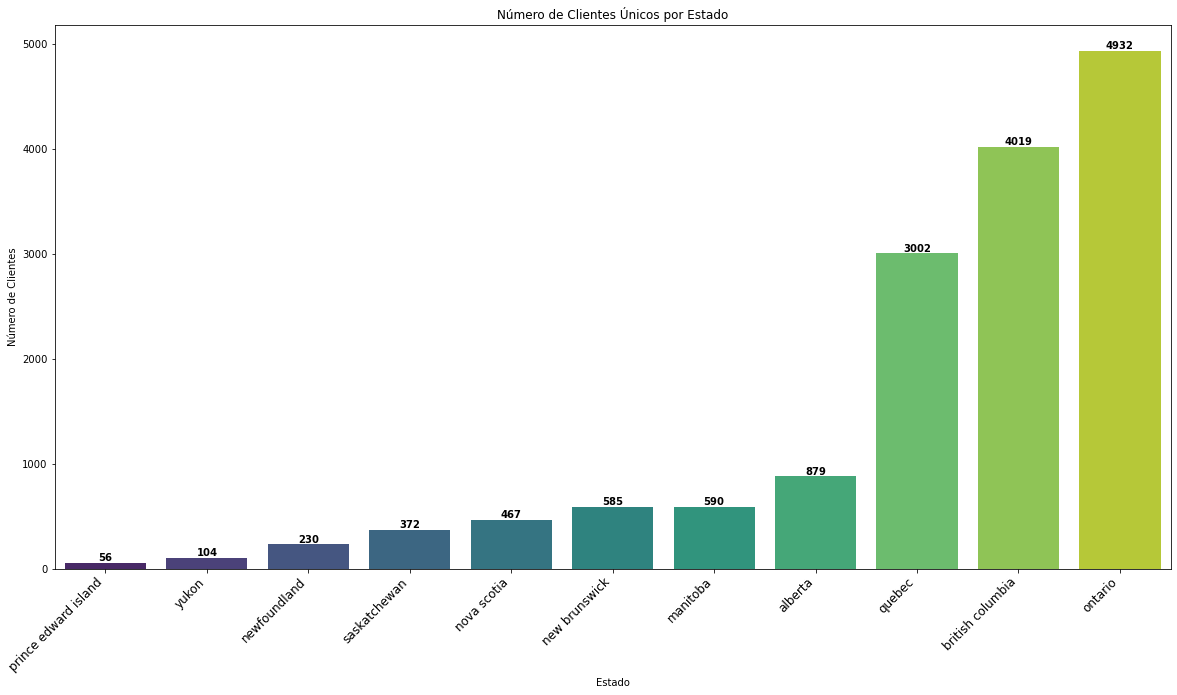

In [177]:
customer_estado = flt_info.groupby(flt_info["province"])["loyalty_number"].nunique()
customer_estado = customer_estado.sort_values(ascending=True)

plt.figure(figsize=(20, 10))

sns.barplot(x=customer_estado.index, y=customer_estado.values, palette = "viridis")

for indice, valor in enumerate(customer_estado.values):
    plt.text(indice, valor, str(valor),
             ha='center', va='bottom', fontweight="bold")
# Ajusta el tamaño de las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)    
# Añade título y etiquetas
plt.title('Número de Clientes Únicos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes');

En el gráfico observamos que el mayor número de clientes proviene del estado de Ontario

**Salario promedio entre diferentes niveles educativos de los clientes**

Como hemos visto en la exploración, el nivel educativo college no contiene información por tanto, filtraremos todas las filas cuyo nivel educativo sea college ya que, no es representativo

In [178]:
flt_education = flt_info.loc[flt_info['education'] != "College"]
flt_education["education"].unique()

array(['bachelor', 'college', 'master', 'doctor', 'high school or below'],
      dtype=object)

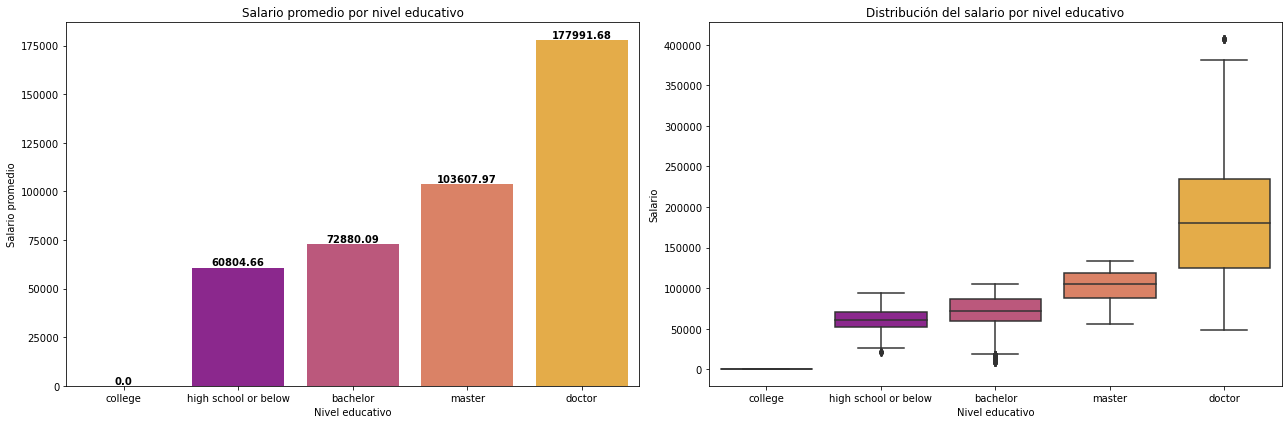

In [179]:
# Obtener el salario promedio por nivel educativo y ordenarlos de menor a mayor
sal_edu = np.round(flt_education.groupby('education')['salary'].mean(), 2)
sal_edu = sal_edu.sort_values(ascending=True)

# Crear una figura con dos subtramas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Barplot con salario promedio
sns.barplot(x=sal_edu.index, y=sal_edu.values, palette="plasma", ax=axes[0])
axes[0].set_title('Salario promedio por nivel educativo')
axes[0].set_xlabel('Nivel educativo')
axes[0].set_ylabel('Salario promedio')

# Añadir etiquetas de valores en las barras
for indice, valor in enumerate(sal_edu.values):
    axes[0].text(indice, valor, str(valor), ha='center', va='bottom', fontweight="bold")

# Boxplot
sns.boxplot(x='education', y='salary', data=flt_education, order=sal_edu.index, palette="plasma", ax=axes[1])
axes[1].set_title('Distribución del salario por nivel educativo')
axes[1].set_xlabel('Nivel educativo')
axes[1].set_ylabel('Salario')

# Ajustar el diseño
plt.tight_layout()

plt.show()

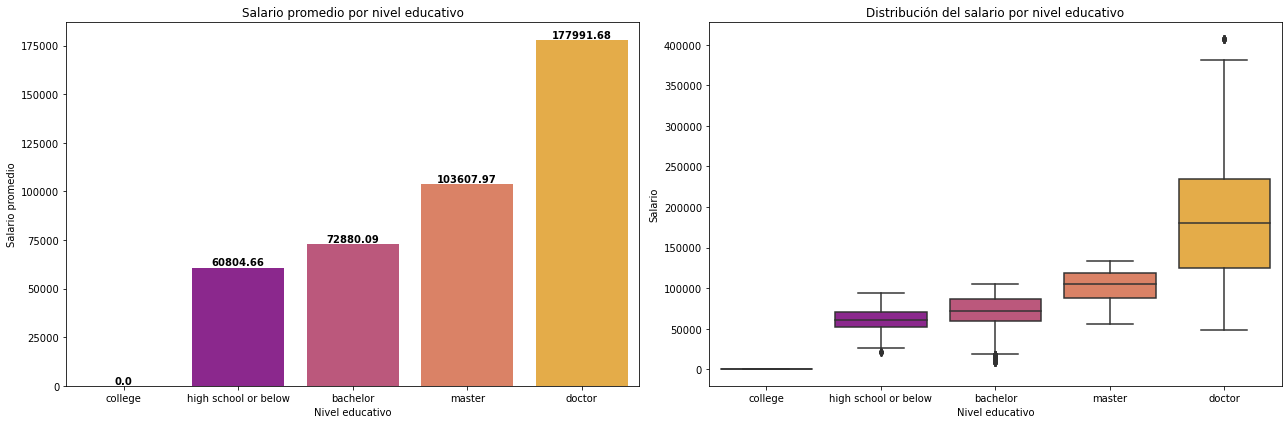

In [180]:
# Obtener el salario promedio por nivel educativo y ordenarlos de menor a mayor
sal_edu_median = np.round(flt_education.groupby('education')['salary'].median(), 2)
sal_edu_median = sal_edu.sort_values(ascending=True)

# Crear una figura con dos subtramas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Barplot con salario promedio
sns.barplot(x=sal_edu_median.index, y=sal_edu_median.values, palette="plasma", ax=axes[0])
axes[0].set_title('Salario promedio por nivel educativo')
axes[0].set_xlabel('Nivel educativo')
axes[0].set_ylabel('Salario promedio')

# Añadir etiquetas de valores en las barras
for indice, valor in enumerate(sal_edu_median.values):
    axes[0].text(indice, valor, str(valor), ha='center', va='bottom', fontweight="bold")

# Boxplot
sns.boxplot(x='education', y='salary', data=flt_education, order=sal_edu_median.index, palette="plasma", ax=axes[1])
axes[1].set_title('Distribución del salario por nivel educativo')
axes[1].set_xlabel('Nivel educativo')
axes[1].set_ylabel('Salario')

# Ajustar el diseño
plt.tight_layout()

plt.show()

In [181]:
high_school = np.round(flt_education[flt_education['education'] == 'high school or below']['salary'].mean(),2)
print(high_school)
print("---------------")
bachelor = np.round(flt_education[flt_education['education'] == 'bachelor']['salary'].mean(),2)
print(bachelor)
print("---------------")
master = np.round(flt_education[flt_education['education'] == 'master']['salary'].mean(),2)
print(master)
print("---------------")
doctor = np.round(flt_education[flt_education['education'] == 'doctor']['salary'].mean(),2)
print(doctor)
print("---------------")


60804.66
---------------
72880.09
---------------
103607.97
---------------
177991.68
---------------


In [182]:
gap_n1 = np.round((bachelor-high_school)/bachelor *100,2)

gap_n2 = np.round((master-bachelor)/master *100,2)

gap_n3 = np.round((doctor-bachelor)/doctor *100,2)

print(gap_n1)
print(gap_n2)
print(gap_n3)

16.57
29.66
59.05


Como podemos observar, el salario promedio por nivel educativo tiene una relación directa, a mayor nivel educativo, mayor salario. Además, tal como vemos el incremento del promedio entre los niveles es muy significativo.
El gap de salario existente entre aquellos clientes que han cursado bachiller y una licenciatura es del 16.57%, aquellos que hayan obtenido un master verán incrementado su salario respecto a los licenciados del 29,66% y aquellos que realicen un doctorado tendrán un 59.05% más de salario que los que realizaron estudios de master

**Proporción de clientes con diferentes tipos de tarjetas de fidelidad**

In [200]:
tipo_tarjeta= flt_info.groupby("loyalty_card")["loyalty_number"].nunique()

total_clientes = tipo_tarjeta.sum()

proporcion_clientes_por_tipo = tipo_tarjeta / total_clientes

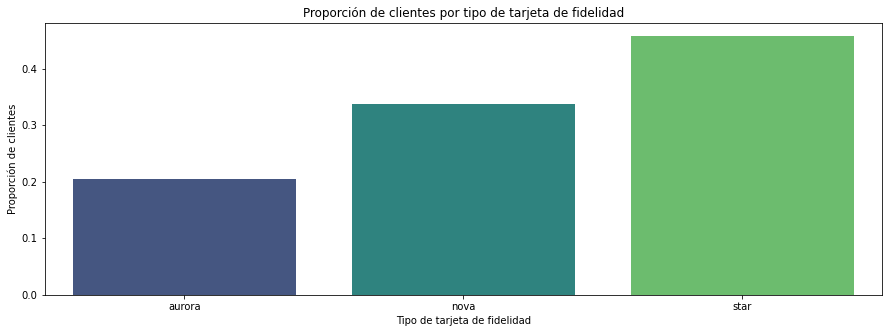

In [207]:
plt.figure(figsize=(15, 5))
sns.barplot(x=proporcion_clientes_por_tipo.index, y=proporcion_clientes_por_tipo.values, palette="viridis")
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.xlabel('Tipo de tarjeta de fidelidad')
plt.ylabel('Proporción de clientes');

- Interpretación

En mayor proporción, los clientes tienen la tarjeta Star

**Distribución de clientes según su estado civil y su genero**

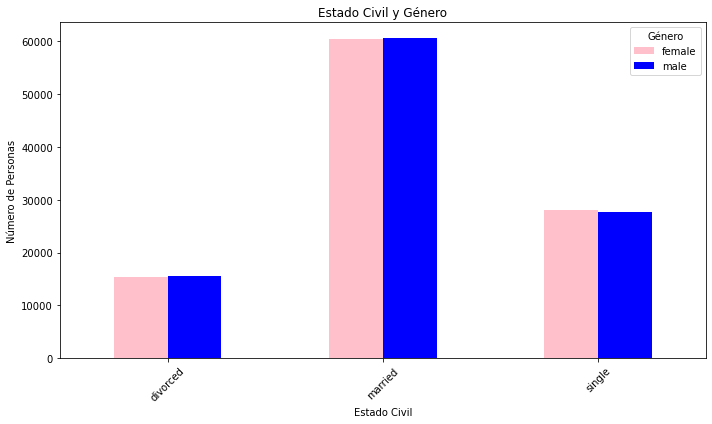

In [183]:
# Contar el número de personas en cada categoría
clientes = flt_info.groupby(['marital_status', 'gender']).size().unstack()

# Crear el gráfico de barras agrupadas
clientes.plot(kind='bar', stacked=False, figsize=(10, 6),color=['pink', 'blue'])

# Agregar etiquetas y título
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.title('Estado Civil y Género')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

Este gráfico nos muestra que nuestros clientes suelen estar casados además, no apreciamos diferencias entre el número de hombres y muejeres entre los clientes

### Tercera fase

In [184]:
book_edu = flt_info.loc[:,['flights_booked','education']]

In [185]:
book_edu.head()


,flights_booked,education
0,3,bachelor
24,10,college
48,6,college
192,6,bachelor
240,3,bachelor


In [186]:
by_edu = book_edu.groupby("education")["flights_booked"].sum().reset_index()

by_edu

,education,flights_booked
0,bachelor,1038123
1,college,426398
2,doctor,74036
3,high school or below,78993
4,master,51614


In [187]:
by_edu['group'] = by_edu['education'].apply(lambda x: "estudios_medios" if x in ['high school or below', 'college','bachelor'] else "estudios_superiores")


In [188]:
by_edu

,education,flights_booked,group
0,bachelor,1038123,estudios_medios
1,college,426398,estudios_medios
2,doctor,74036,estudios_superiores
3,high school or below,78993,estudios_medios
4,master,51614,estudios_superiores


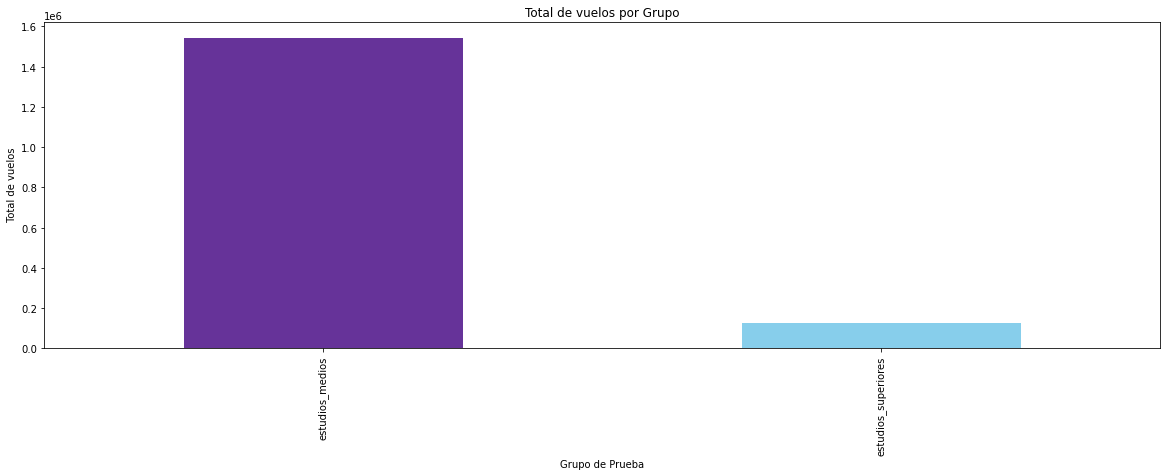

In [189]:
# Crear los subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Calcular la suma del total de anuncios por grupo
grouped_data = by_edu.groupby('group')['flights_booked'].sum()

# Crear el gráfico de barras
grouped_data.plot(kind='bar', ax=ax, color=['rebeccapurple', 'skyblue'])

# Añadir etiquetas y título
ax.set_ylabel(' Total de vuelos')
ax.set_xlabel('Grupo de Prueba')
ax.set_title( 'Total de vuelos por Grupo');

In [190]:
estudios_medios = by_edu[by_edu['group'] == 'estudios_medios']

estudios_medios.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_booked,3.0,514504.666667,485597.238211,78993.0,252695.5,426398.0,732260.5,1038123.0


In [191]:
estudios_superiores = by_edu[by_edu['group'] == 'estudios_superiores']

estudios_superiores.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_booked,2.0,62825.0,15854.748248,51614.0,57219.5,62825.0,68430.5,74036.0


- H0: No hay relación entre el nivel educativo y el número de vuelos reservados
- H1: Existen diferencias entre los vuelos reservados en función del nivel educativo

In [192]:
def normalidad(dataframe, columna):
  
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [193]:
normalidad(by_edu,"flights_booked")

Para la columna flights_booked los datos no siguen una distribución normal.


In [194]:
def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos="group"):
    # Filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]

    # Filtramos el DataFrame para quedarnos solo con los datos de test
    test = dataframe[dataframe[columna_grupos] == grupo_test]

    # Iteramos por las columnas de las métricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        # Filtramos el conjunto de datos para quedarnos solo con la columna de la métrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]

        # Aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)

        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")

# Llamamos a la función con los nombres de las columnas
test_man_whitney(by_edu, ["flights_booked"], "estudios_medios", "estudios_superiores")

Para la métrica flights_booked, las medianas son iguales.


- Interpretación

En este análisis se agrupa los niveles educativos en dos grupos, niveles medios y niveles superiores. Como podemos ver en el gráfico, podríamos decir que las personas con un nivel de estudios medios reserva más vuelos que aquellos que tienen un nivel de estudios superiores, pudiendo rechazar nuestra hipótesis nula, sin embargo, el test de man_whitney nos dice que las medianas son iguales.